In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [665]:
eeg_data = pd.read_csv('lasso_features.csv')
eeg_data.head(10)

,PersonID,Group,C4_FractalDimension_var,P7_Entropy_median,F4_FractalDimension_median,Fz_Envelope_Std_var,O1_Entropy_max,P7_Variance_median,Fz_Entropy_max,Fp2_Envelope_Std_std,...,Fp1_Entropy_var,Fp1_Envelope_Std_std,C3_TBR_var,Fp2_TBR_var,F4_FractalDimension_min,P4_TBR_var,P7_Envelope_Std_min,F4_TBR_min,C3_Theta_Power_var,Fz_FractalDimension_std
0,0,1,0.004187,5.666374,1.228544,144.867256,5.736316,13991.863210,5.710198,17.110672,...,0.001162,18.379716,28.072558,2.859656,1.109129,34.612807,58.631772,2.172914,144480.586991,0.069623
1,1,1,0.006048,5.666846,1.203583,95.242627,5.709562,7433.216179,5.716130,12.917158,...,0.000971,11.418470,11.978448,7.160080,1.062041,9.157917,44.196680,1.921591,20634.397272,0.062204
2,2,1,0.006374,5.673189,1.133485,110.155861,5.718050,5416.831659,5.725061,7.405514,...,0.000608,7.200715,11.372986,3.180992,0.936406,4.338682,38.096475,1.288065,21078.377635,0.072038
3,3,1,0.014722,5.665577,1.163408,57.883705,5.703135,3941.662204,5.718669,21.601225,...,0.002135,21.380293,7.608795,5.546961,1.023633,6.780729,32.595542,2.130512,14878.468126,0.055299
4,4,1,0.015814,5.663820,1.122900,20.459310,5.725216,3855.347515,5.722891,9.618080,...,0.001083,5.894500,10.753238,3.142890,0.830466,6.715360,33.448590,1.639184,19498.379485,0.065825
5,5,1,0.005733,5.673917,1.150356,26.772901,5.722887,2880.577461,5.713834,11.288928,...,0.002402,12.542866,11.055948,8.406636,0.990346,10.102329,24.555544,1.357531,6982.784107,0.055845
6,6,1,0.010237,5.669725,1.274656,63.267221,5.719126,5409.093447,5.737969,12.991949,...,0.001746,15.320259,5.231374,2.194530,1.141374,5.119391,37.568289,3.519222,11689.339850,0.065245
7,7,1,0.003227,5.676261,1.265052,57.536021,5.732578,5020.912816,5.729965,9.922932,...,0.000647,5.801752,15.661180,2.433983,1.102087,25.729036,38.448454,2.614610,32581.640601,0.068145
8,8,1,0.024969,5.654337,1.213331,556.204898,5.713626,7726.685307,5.741100,13.788295,...,0.006954,43.934548,15.978611,7.904021,1.051860,2.404894,44.480201,2.728748,112733.583322,0.072464
9,9,1,0.009046,5.662851,1.229237,141.623552,5.709137,8768.067963,5.734175,17.696866,...,0.000854,9.907591,5.784186,3.618841,1.015580,10.810793,48.618952,2.350407,11692.748663,0.080044


In [666]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').squeeze()
y_test = pd.read_csv('y_test.csv').squeeze()

In [667]:
# add standard scaler for logistic regression and svm
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.79      0.79      0.79        14

    accuracy                           0.76        25
   macro avg       0.76      0.76      0.76        25
weighted avg       0.76      0.76      0.76        25



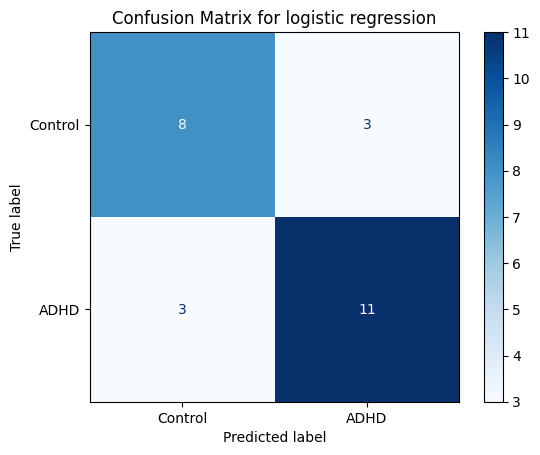

In [668]:
from sklearn.linear_model import LogisticRegression

# logistic regression
log_reg = LogisticRegression(random_state=42, max_iter=1000, class_weight="balanced") 
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

lr_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", lr_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Control", "ADHD"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for logistic regression")
plt.show()

Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.82      0.75        11
           1       0.83      0.71      0.77        14

    accuracy                           0.76        25
   macro avg       0.76      0.77      0.76        25
weighted avg       0.77      0.76      0.76        25



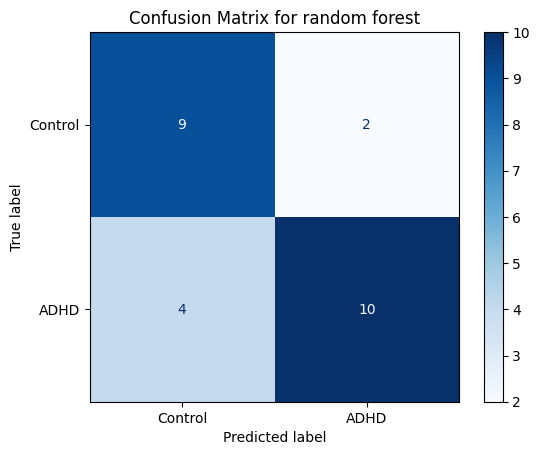

In [676]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

# random forest classifier
rf = RandomForestClassifier(random_state=42, class_weight="balanced")
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred)

# Evaluate the model
print("Accuracy:", rf_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Control", "ADHD"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for random forest")
plt.show()

Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.78      0.64      0.70        11
           1       0.75      0.86      0.80        14

    accuracy                           0.76        25
   macro avg       0.76      0.75      0.75        25
weighted avg       0.76      0.76      0.76        25



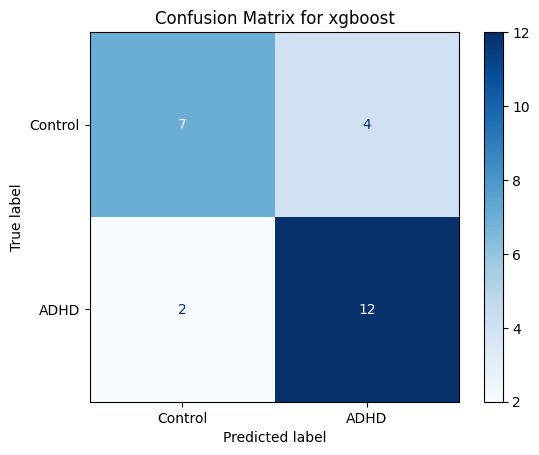

In [677]:
from xgboost import XGBClassifier

# XGBoost model

# adjust weight - model predicted control too often
scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1])

xgb = XGBClassifier(eval_metric='logloss', scale_pos_weight=scale_pos_weight) 
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

xgb_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", xgb_accuracy)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Control", "ADHD"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for xgboost")
plt.show()

Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.81      0.93      0.87        14

    accuracy                           0.84        25
   macro avg       0.85      0.83      0.83        25
weighted avg       0.85      0.84      0.84        25



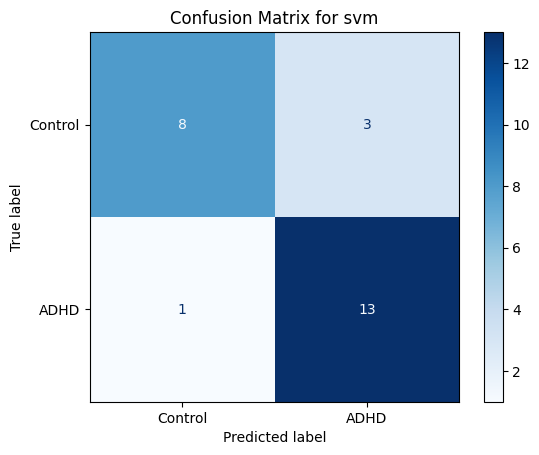

In [680]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# SVM with grid search
svm = SVC(probability=True, class_weight='balanced')
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']}
grid = GridSearchCV(svm, param_grid, refit=True, scoring='accuracy')

grid.fit(X_train_scaled, y_train)

y_pred = grid.best_estimator_.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", svm_accuracy)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Control", "ADHD"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for svm")
plt.show()

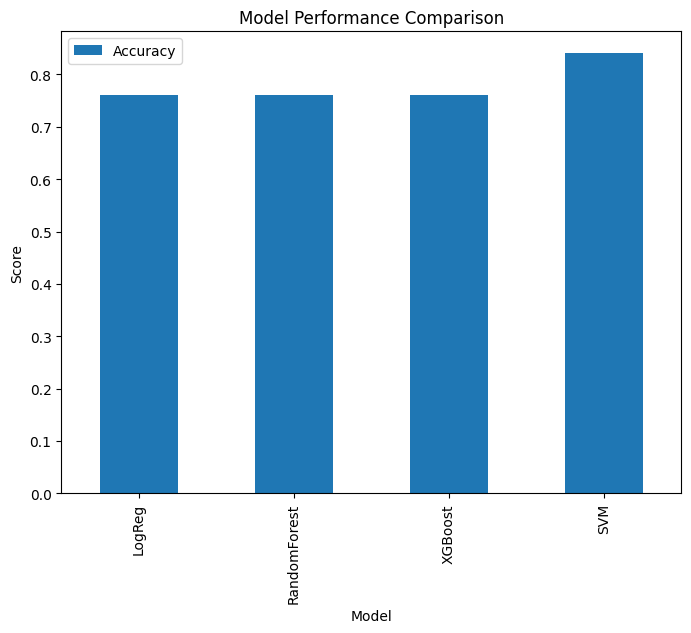

In [685]:
# plot comparison by accuracy 
metrics = {
    "Model": ["LogReg", "RandomForest", "XGBoost", "SVM"],
    "Accuracy": [lr_accuracy, rf_accuracy, xgb_accuracy, svm_accuracy]
}
df_metrics = pd.DataFrame(metrics)
df_metrics.plot(x="Model", kind="bar", figsize=(8, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.show()

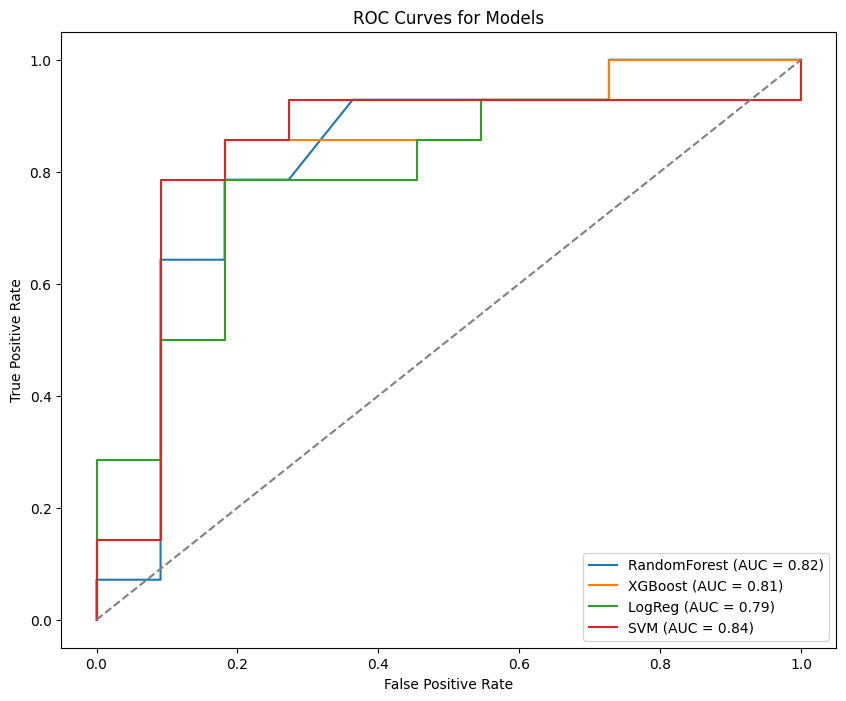

In [681]:
from sklearn.metrics import roc_curve, auc

# plot comparison by roc curve

normal_models = [("RandomForest", rf), ("XGBoost", xgb)]
scaled_models = [("LogReg", log_reg), ("SVM", grid.best_estimator_)]

plt.figure(figsize=(10, 8))

for label, model in normal_models:
    y_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc_score:.2f})")

for label, model in scaled_models:
    y_proba = model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Curves for Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

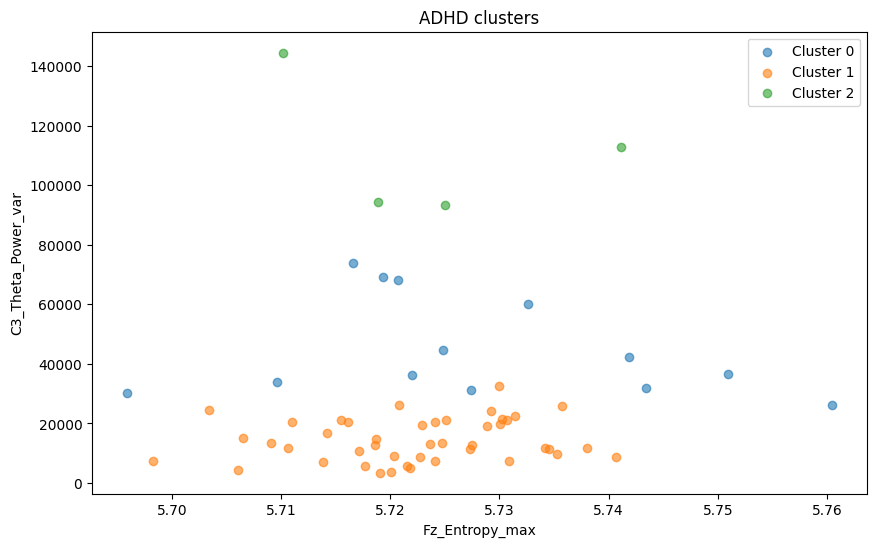

In [702]:
from sklearn.cluster import KMeans

# get only ADHD group
adhd_data = eeg_data[eeg_data['Group'] == 1].copy()

columns = adhd_data.drop(columns=['PersonID', 'Group']).columns
X = adhd_data[columns]

# perform k-means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

adhd_data['cluster'] = kmeans.fit_predict(adhd_data[columns])

# plot clusters
plt.figure(figsize=(10, 6))
for cluster in range(3):
    subset = adhd_data[adhd_data['cluster'] == cluster]
    plt.scatter(subset['Fz_Entropy_max'], subset['C3_Theta_Power_var'], label=f"Cluster {cluster}", alpha=0.6)
plt.xlabel("Fz_Entropy_max")
plt.ylabel("C3_Theta_Power_var")
plt.title("ADHD clusters")
plt.legend()
plt.show()

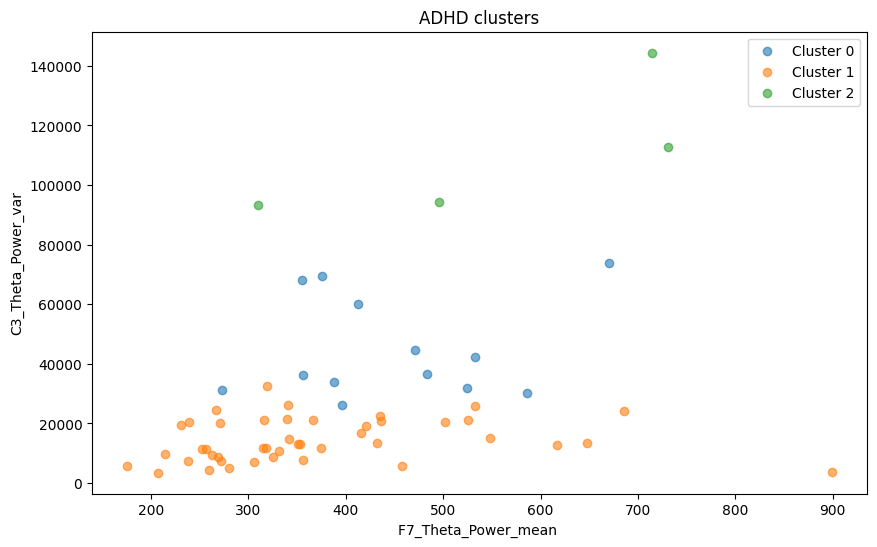

In [703]:
plt.figure(figsize=(10, 6))
for cluster in range(3):
    subset = adhd_data[adhd_data['cluster'] == cluster]
    plt.scatter(subset['F7_Theta_Power_mean'], subset['C3_Theta_Power_var'], label=f"Cluster {cluster}", alpha=0.6)
plt.xlabel("F7_Theta_Power_mean ")
plt.ylabel("C3_Theta_Power_var")
plt.title("ADHD clusters")
plt.legend()
plt.show()

In [691]:
from sklearn.metrics import silhouette_score
import itertools

feature_list = adhd_data.drop(columns=['PersonID', 'Group', 'cluster']).columns

# find the silhouette scores for all feature pairs
best_score = -1
best_features = None
for feature_pair in itertools.combinations(feature_list, 2):
    subset = adhd_data[list(feature_pair)]
    # compute silhouette score
    score = silhouette_score(subset, adhd_data['cluster'])
    if score > 0.5:
        print(f"{feature_pair}: {score}")
    # update the best score and features
    if score > best_score:
        best_score = score
        best_features = feature_pair

print(f"Best Feature Pair: {best_features}, Best Silhouette Score: {best_score}")


('C4_FractalDimension_var', 'C3_Theta_Power_var'): 0.5946007088713
('P7_Entropy_median', 'C3_Theta_Power_var'): 0.5946007088707059
('F4_FractalDimension_median', 'C3_Theta_Power_var'): 0.5946007087446149
('Fz_Envelope_Std_var', 'C3_Theta_Power_var'): 0.5945859056368304
('O1_Entropy_max', 'C3_Theta_Power_var'): 0.594600708865505
('P7_Variance_median', 'C3_Theta_Power_var'): 0.5739976249319192
('Fz_Entropy_max', 'C3_Theta_Power_var'): 0.5946007088728604
('Fp2_Envelope_Std_std', 'C3_Theta_Power_var'): 0.5945999046213151
('Fz_Entropy_median', 'C3_Theta_Power_var'): 0.5946007088705755
('Fz_Entropy_min', 'C3_Theta_Power_var'): 0.5946007088674375
('Fp1_Theta_Power_max', 'C3_Theta_Power_var'): 0.5923863257413197
('O1_Envelope_Std_mean', 'C3_Theta_Power_var'): 0.5945971863894587
('C4_TBR_median', 'C3_Theta_Power_var'): 0.5946006252406444
('P7_Theta_Power_max', 'C3_Theta_Power_var'): 0.5931649102866592
('Fp1_Entropy_median', 'C3_Theta_Power_var'): 0.5946007088705577
('O1_Entropy_mean', 'C3_Theta